# 📉 Customer Churn Prediction (2025)

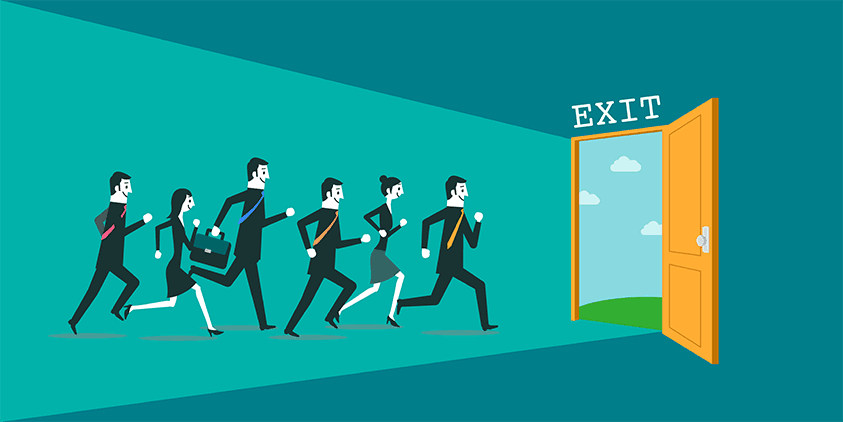

In [104]:
from IPython.display import display, Image
display(Image(filename="/kaggle/input/pictures/pic.png"))


### 📌 Project Overview
This project aims to predict customer churn using machine learning models. The dataset contains customer behavior data from a telecom company, with various features such as customer demographics, usage patterns, and subscription details. By applying different classification models, we identify the most effective approach for predicting whether a customer will churn or remain.

## 📊 Dataset
The dataset consists of customer information like tenure, online security, contract type, and payment methods, along with their subscription status (churn or no churn). The data has been preprocessed using techniques such as scaling, encoding, and handling class imbalances to ensure optimal model performance.

## ⚙️ Models Used
We experimented with various classification models and fine-tuned hyperparameters to find the best-performing model:

🔹 Random Forest Classifier

🔹 Decision Tree Classifier

🔹 K-Nearest Neighbors (KNN)

🔹 XGBoost Classifier

🔹 LightGBM Classifier

🔹 Stacked Model (Best Performing Model)

## 🔮 Churn Prediction
Using machine learning models like Random Forest, XGBoost, and Stacking, we successfully built a model that predicts whether a customer will churn based on features like account age, subscription type, and usage frequency. The model was trained on historical data and fine-tuned using hyperparameter optimization.                    
The output of the model provides an accurate prediction of churn, helping businesses identify at-risk customers and take proactive steps to retain them.

## 📈 Key Findings
✅ Customer tenure has a strong negative correlation with churn—longer tenures are associated with lower churn rates.                                    
✅ Payment method and contract type are critical features in predicting churn behavior.       
✅ The stacked model provided the best performance, combining the strengths of multiple classifiers to minimize errors and avoid overfitting.

## 📊 Results & Performance
🎯 Train Score: ~99.75%                    
🎯 Test Score: ~82.28%                                   
✅ Minimal Overfitting: While some models showed signs of overfitting (like Random Forest), models such as XGBoost and the stacked model, showed good generalization performance.                  

## 📁Dataset 

Kaggle Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 👩‍💻 Author & Contact
📌 Project by: **Nazanin Mahmoudy**, 2025                           
📧 Email: Nazaninmahmoudy@gmail.com         
🔗 GitHub: https://github.com/Nazaninmahmoudi                 
🔗 Kaggle: https://www.kaggle.com/nazaninmahmoudy   



In [94]:
# ===============================
# Visualization Libraries
# ===============================
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno

# ===============================
# Date and Time Libraries
# ===============================
from datetime import date

# ===============================
# Model Evaluation and Metrics
# ===============================
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score

# ===============================
# Data Preprocessing
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# ===============================
# Classification Models
# ===============================
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# ===============================
# Warnings Handling
# ===============================
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


In [32]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Exploring Data

In [33]:
df.shape

(7043, 21)

In [34]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Manipulation 

In [35]:
df.drop("customerID",axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Looks like 'TotalCharges' is being treated as a string (object) instead of a number. We’ll need to fix that and convert it to a numeric type so we can use it properly.

In [38]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [39]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

As we can see, there are 11 rows with null values 

**Handeling null values**

In [40]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

df.shape
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [41]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**Separating categorical and numerical columns**


In [42]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## Visualization

**Distribution Analysis**

In [43]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color = "red", linestyle="--", label="Mean")
    plt.axvline(col_median, color = "blue", linestyle="--", label="Median")
    
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

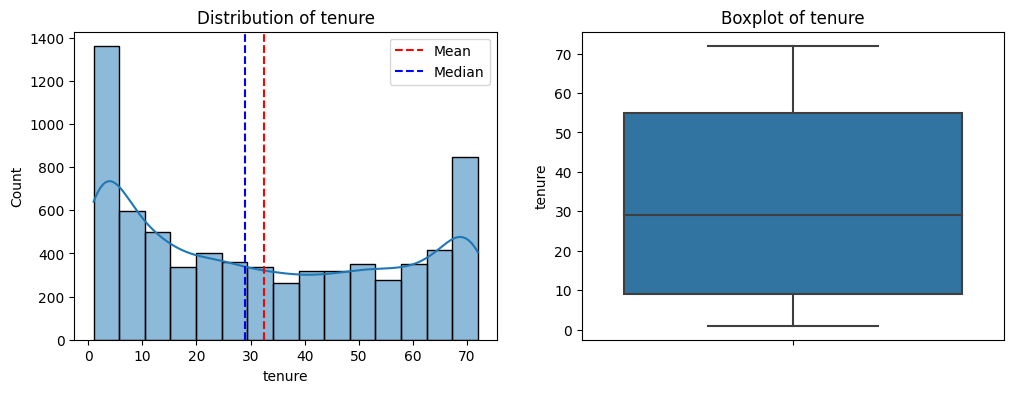

In [44]:
plot_distribution(df,"tenure")


### Tenure Distribution and Boxplot Analysis

Many customers have a short tenure (~0 months) → Indicates frequent churn or a lot of new customers.The distribution is skewed toward the lower end, meaning more customers have shorter tenures.                           

Some customers have long tenures (~70 months) → Shows loyal customers who stay for a long time.                

The mean (🔴 red dashed line) is higher than the median (🔵 blue dashed line) → Right-skewed distribution.



As we can see in the boxplot, 50% of customers stay between 10 and 60 months.         

Also,tenure values are spread relatively evenly, meaning low posseblity of ouliers.

The median tenure is around 30 months, meaning half of customers leave before this

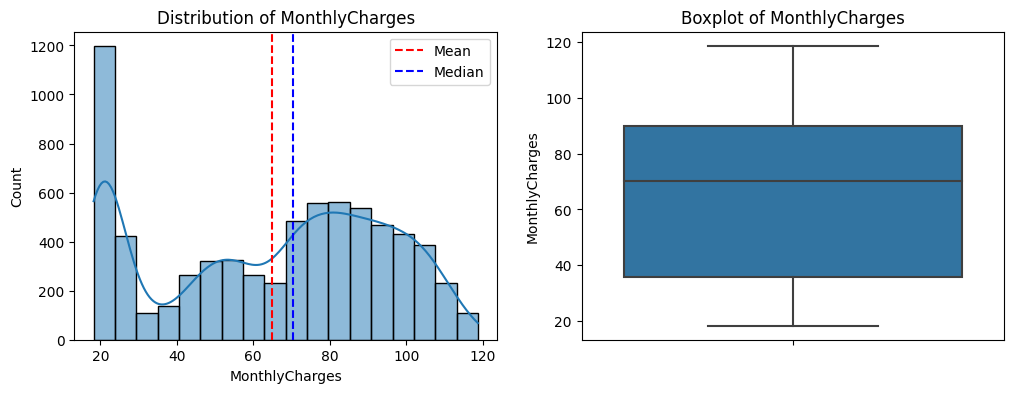

In [45]:
plot_distribution(df, "MonthlyCharges")

### Monthlycharges Distribution Analysis

the data appears right-skewed, meaning that most customers have lower monthly charges, with fewer customers paying higher amounts.                                                                                                                                                                    
The mean (🔴 red dashed line) is slightly greater than the median (🔵 blue dashed line),                               reinforcing the right-skewed nature of the data.                                                                                                
A large concentration of data points is observed around the lower end (15–25 range),with a gradual decrease towards higher values ,confirming that the data is not normally distributed.                 
The boxplot confirms the skewness and helps identify the concentration of values and potential outliers.       

### Numerical Feature Distribution Analysis

Summary Statistics for SeniorCitizen:

count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
10%         0.000000
20%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
--------------------------------------------------


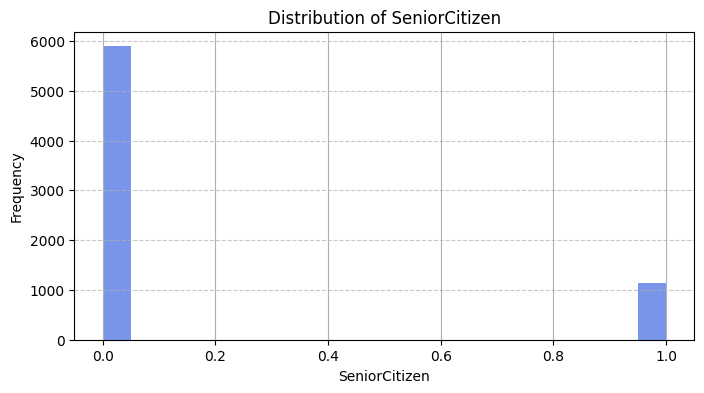

Summary Statistics for tenure:

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
10%         2.000000
20%         6.000000
40%        20.000000
50%        29.000000
60%        40.000000
80%        60.800000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64
--------------------------------------------------


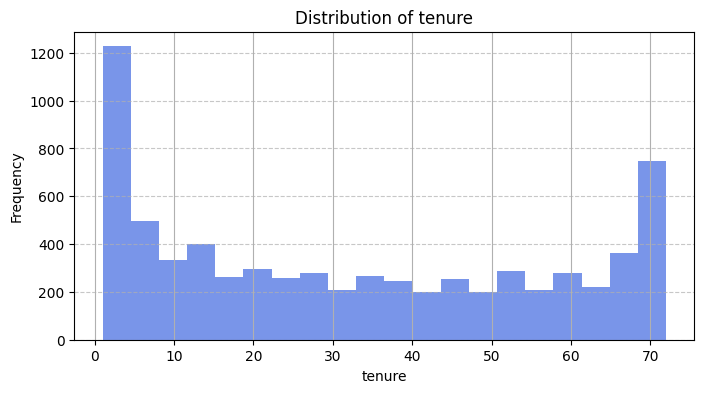

Summary Statistics for MonthlyCharges:

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
10%        20.050000
20%        25.050000
40%        58.920000
50%        70.350000
60%        79.150000
80%        94.300000
90%       102.645000
95%       107.422500
99%       114.734500
max       118.750000
Name: MonthlyCharges, dtype: float64
--------------------------------------------------


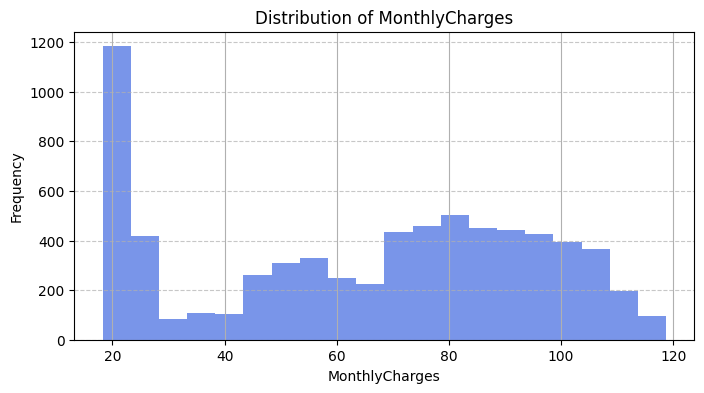

Summary Statistics for TotalCharges:

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
10%        84.600000
20%       267.070000
40%       944.170000
50%      1397.475000
60%      2048.950000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64
--------------------------------------------------


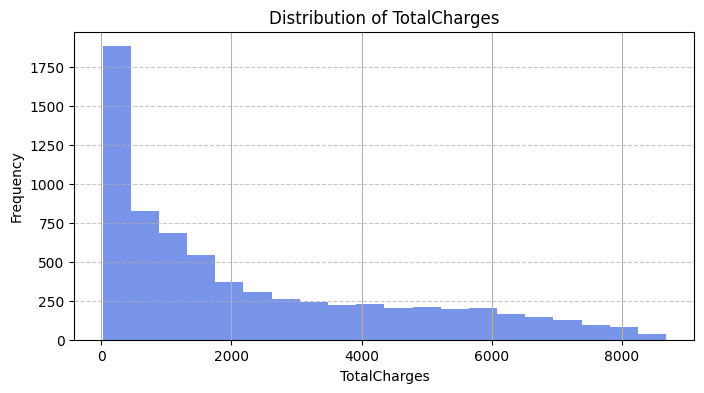

In [46]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.10, 0.20, 0.40, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]

    print(f"Summary Statistics for {numerical_col}:\n")
    print(dataframe[numerical_col].describe(quantiles).T)
    print("-" * 50)

    if plot:
        plt.figure(figsize=(8, 4))
        dataframe[numerical_col].hist(bins=20, color='royalblue', alpha=0.7)
        plt.xlabel(numerical_col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {numerical_col}")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)


#### Analyze

**Tenure**
The distribution shows two peaks, indicating a significant number of new customers (low tenure) and a considerable number of long-term customers (high tenure). This bimodal distribution suggests two main customer groups based on their duration with the company.

**Monthly Charges**
The distribution is somewhat bimodal, with one peak at the lower end (around 20 dollars) and another at the higher end (around 80-90 dollars). This indicates the presence of different customer groups based on the services they subscribe to—some prefer basic, lower-cost services, while others opt for more expensive packages.

**Total Charges**
The distribution is right-skewed, meaning a large number of customers have relatively low total charges. This aligns with the fact that many customers have shorter tenures.

### Categorical Feature Distribution Analysis

Summary for gender column:
        Count  Ratio (%)
gender                  
Male     3549  50.469283
Female   3483  49.530717
##########################################


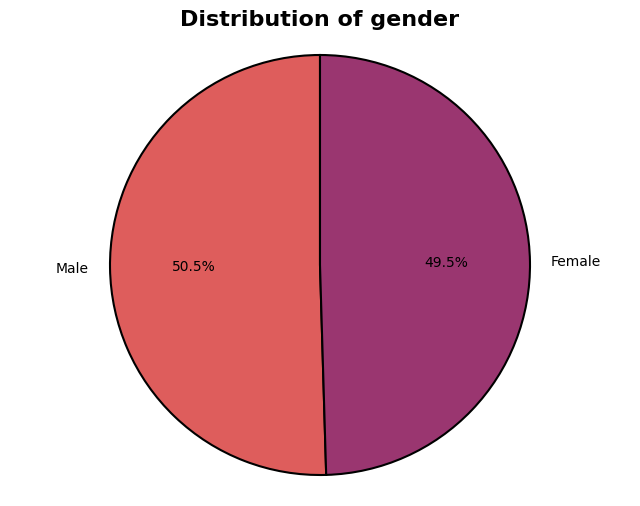

Summary for Partner column:
         Count  Ratio (%)
Partner                  
No        3639  51.749147
Yes       3393  48.250853
##########################################


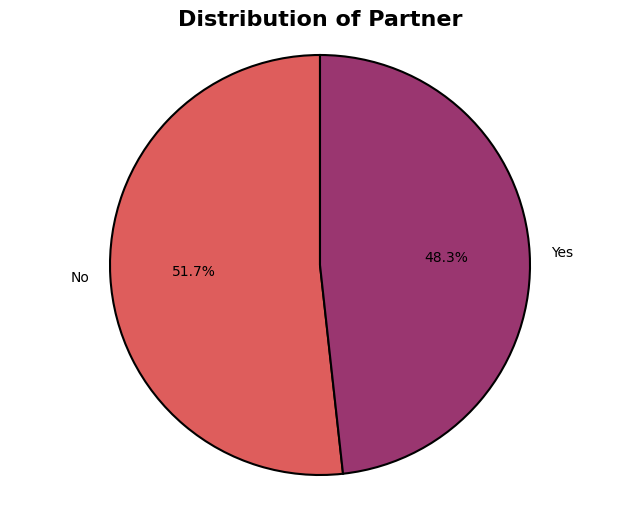

Summary for Dependents column:
            Count  Ratio (%)
Dependents                  
No           4933  70.150739
Yes          2099  29.849261
##########################################


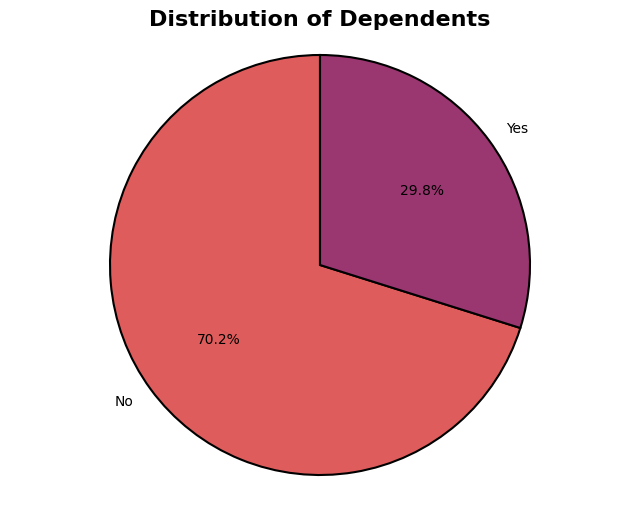

Summary for PhoneService column:
              Count  Ratio (%)
PhoneService                  
Yes            6352   90.32992
No              680    9.67008
##########################################


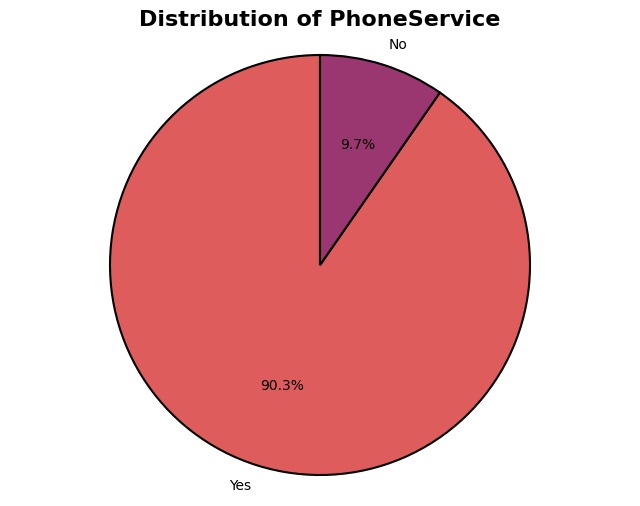

Summary for MultipleLines column:
                  Count  Ratio (%)
MultipleLines                     
No                 3385  48.137088
Yes                2967  42.192833
No phone service    680   9.670080
##########################################


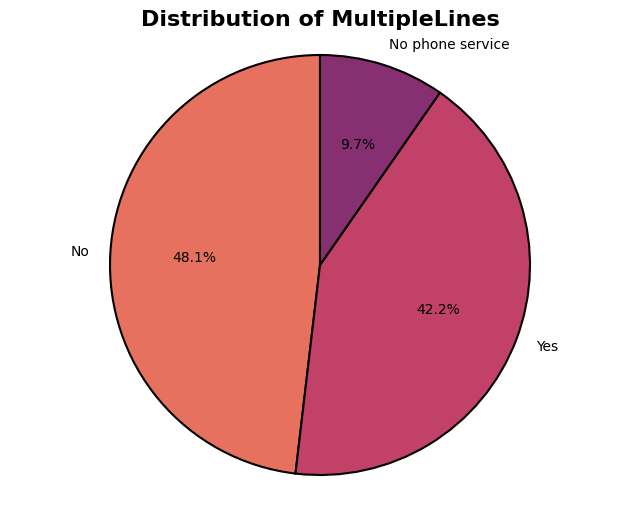

Summary for InternetService column:
                 Count  Ratio (%)
InternetService                  
Fiber optic       3096  44.027304
DSL               2416  34.357224
No                1520  21.615472
##########################################


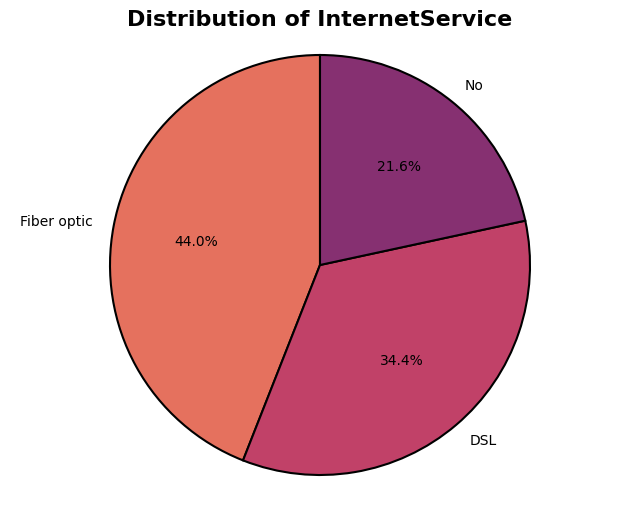

Summary for OnlineSecurity column:
                     Count  Ratio (%)
OnlineSecurity                       
No                    3497  49.729807
Yes                   2015  28.654721
No internet service   1520  21.615472
##########################################


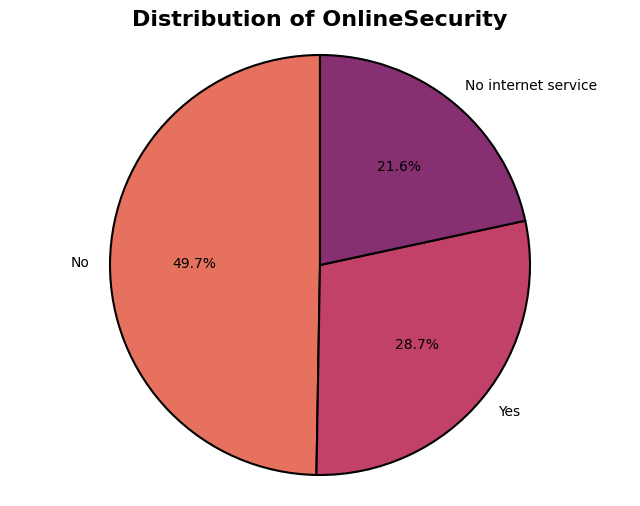

Summary for OnlineBackup column:
                     Count  Ratio (%)
OnlineBackup                         
No                    3087  43.899317
Yes                   2425  34.485210
No internet service   1520  21.615472
##########################################


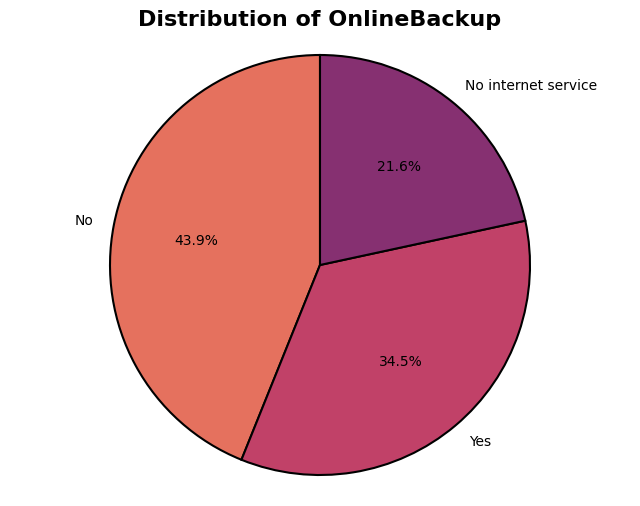

Summary for DeviceProtection column:
                     Count  Ratio (%)
DeviceProtection                     
No                    3094  43.998862
Yes                   2418  34.385666
No internet service   1520  21.615472
##########################################


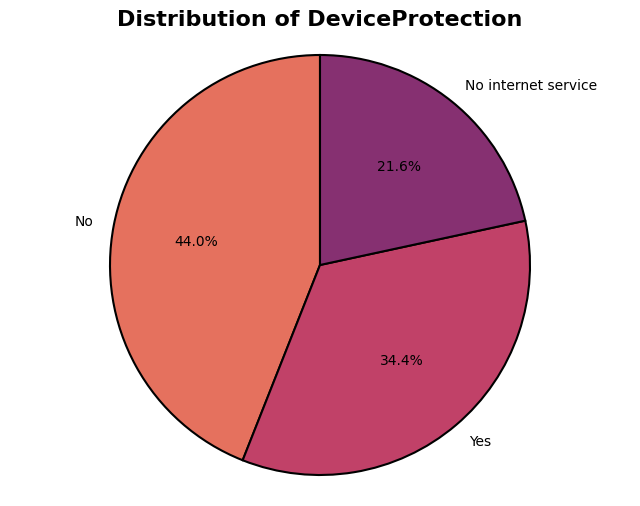

Summary for TechSupport column:
                     Count  Ratio (%)
TechSupport                          
No                    3472  49.374289
Yes                   2040  29.010239
No internet service   1520  21.615472
##########################################


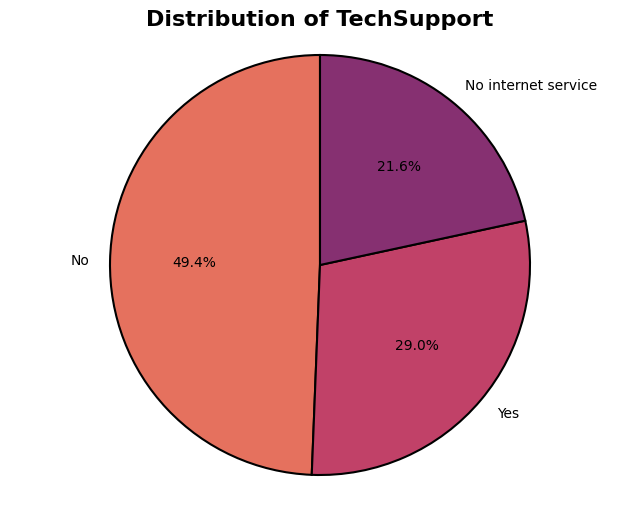

Summary for StreamingTV column:
                     Count  Ratio (%)
StreamingTV                          
No                    2809  39.945961
Yes                   2703  38.438567
No internet service   1520  21.615472
##########################################


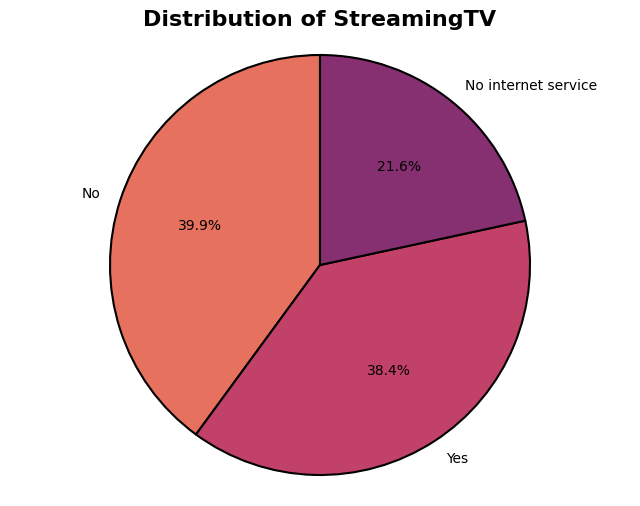

Summary for StreamingMovies column:
                     Count  Ratio (%)
StreamingMovies                      
No                    2781  39.547782
Yes                   2731  38.836746
No internet service   1520  21.615472
##########################################


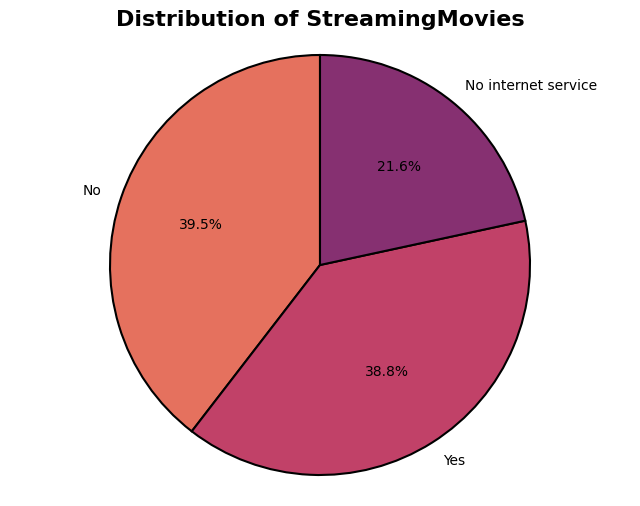

Summary for Contract column:
                Count  Ratio (%)
Contract                        
Month-to-month   3875  55.105233
Two year         1685  23.961889
One year         1472  20.932878
##########################################


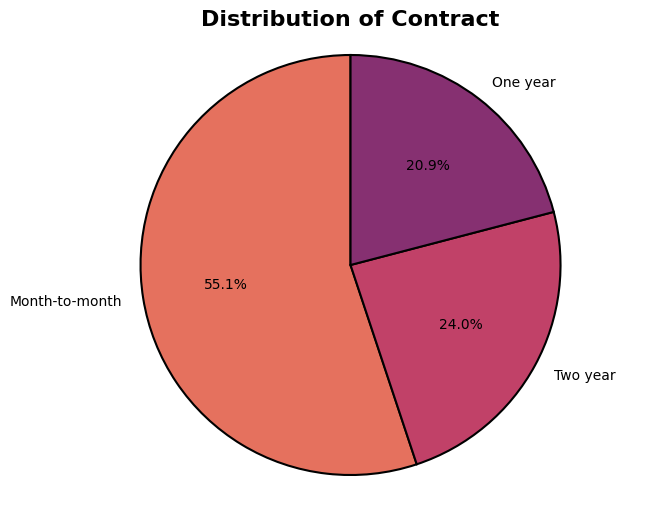

Summary for PaperlessBilling column:
                  Count  Ratio (%)
PaperlessBilling                  
Yes                4168    59.2719
No                 2864    40.7281
##########################################


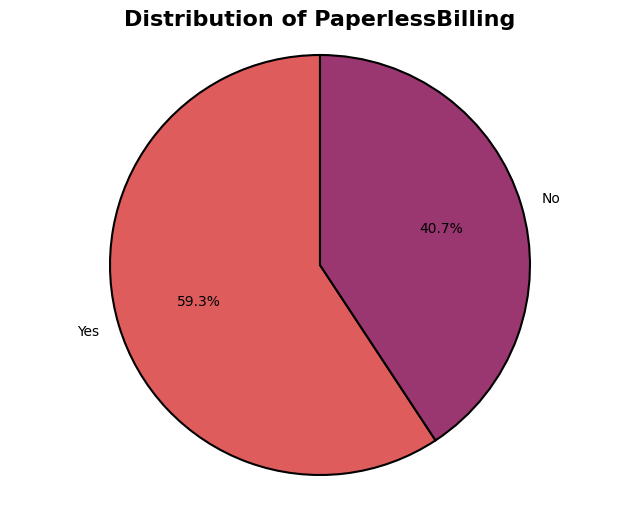

Summary for PaymentMethod column:
                           Count  Ratio (%)
PaymentMethod                              
Electronic check            2365  33.631968
Mailed check                1604  22.810011
Bank transfer (automatic)   1542  21.928328
Credit card (automatic)     1521  21.629693
##########################################


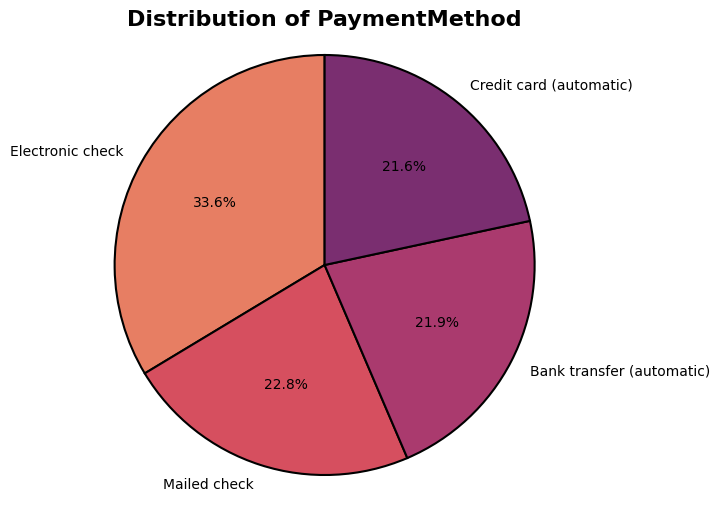

Summary for Churn column:
       Count  Ratio (%)
Churn                  
No      5163  73.421502
Yes     1869  26.578498
##########################################


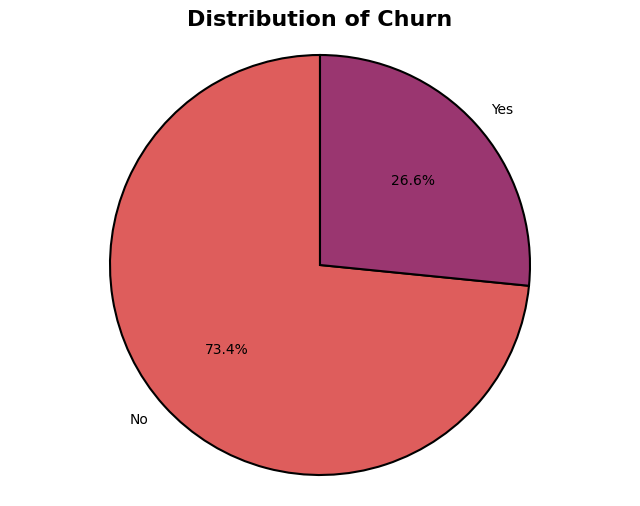

In [47]:
def cat_summary_pie_chart_vibrant(dataframe, col_name, plot=False):
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Ratio (%)': ratio
    })
    
    print(f"Summary for {col_name} column:")
    print(summary_df)
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.pie(value_counts, 
                labels=value_counts.index, 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=sns.color_palette("flare", len(value_counts)), 
                wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})  
        plt.title(f'Distribution of {col_name}', fontsize=16, fontweight='bold')
        plt.axis('equal')  
        plt.show(block=True)





def plot_cat_features(dataframe, plot=True):
    cat_cols = dataframe.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        cat_summary_pie_chart_vibrant(dataframe, col, plot)

plot_cat_features(df, plot=True)


### Churn Analysis for Categorical Numerical Features

In [48]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [49]:
df[df.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [50]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

Text(0.5, 1.0, 'Customer Churn Prediction')

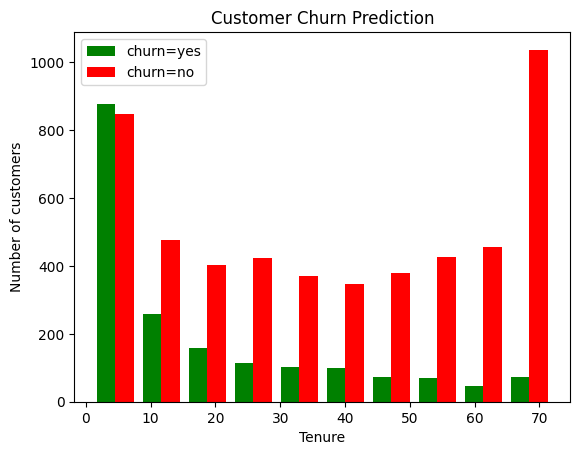

In [51]:
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'], label=['churn=yes','churn=no'])
plt.legend()

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")

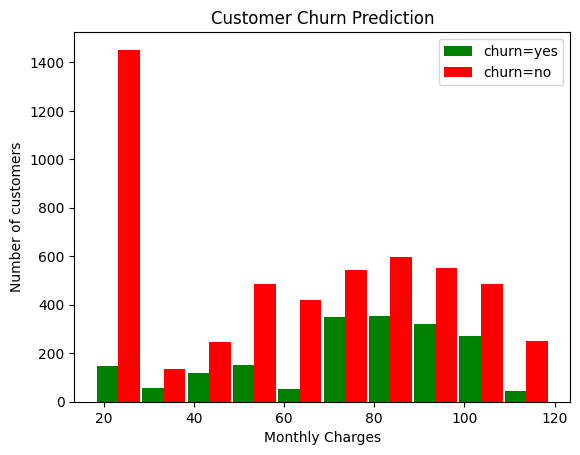

In [52]:
mc_churn_no=df[df.Churn=="No"].MonthlyCharges
mc_churn_yes=df[df.Churn=="Yes"].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")

plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95, color=['green','red'], label=['churn=yes','churn=no'])
plt.legend()

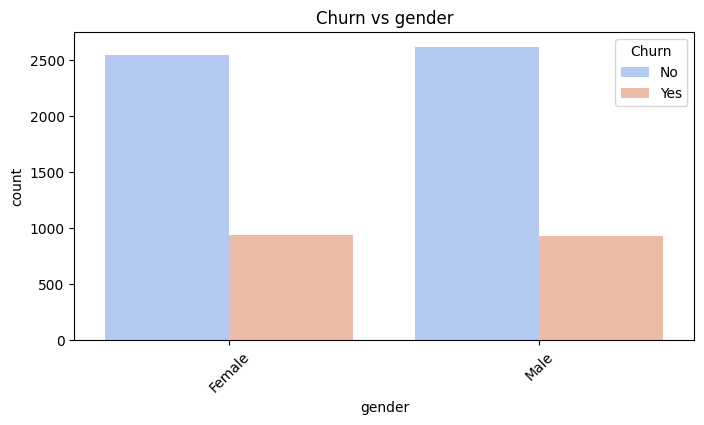

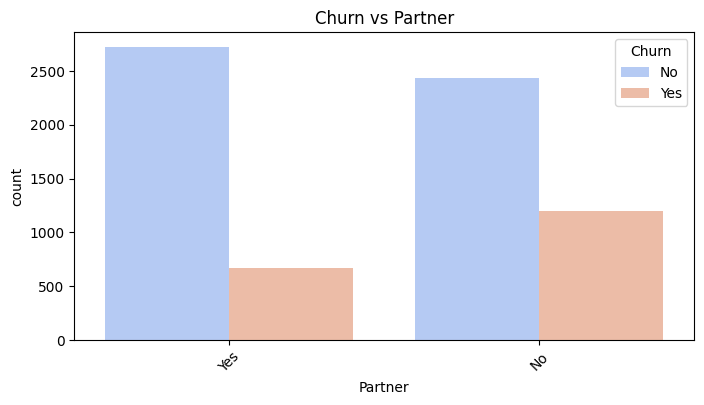

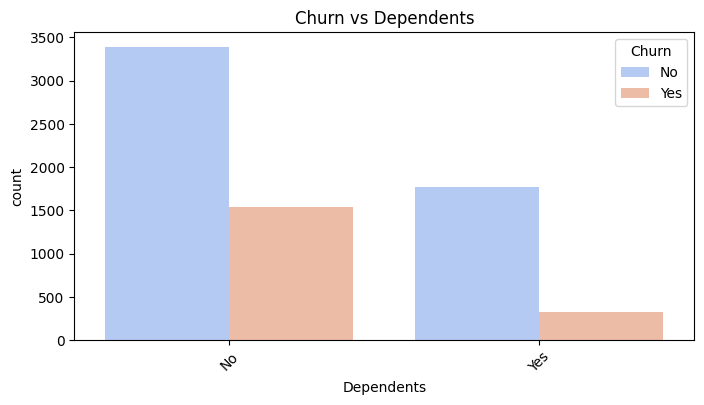

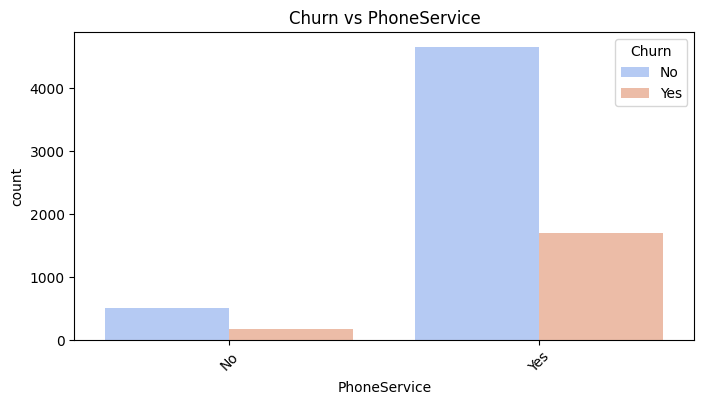

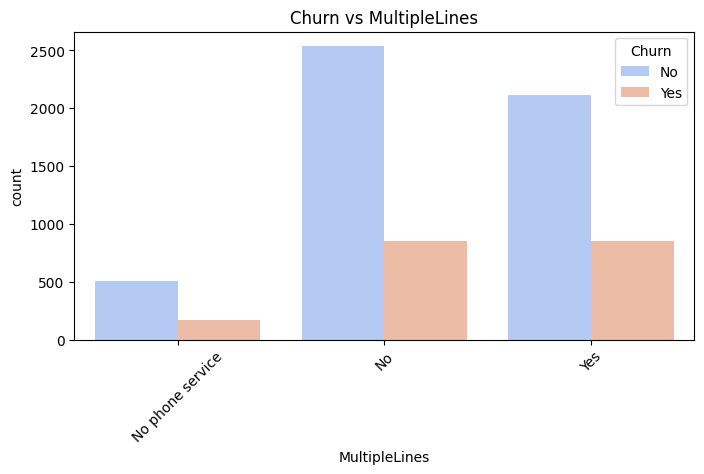

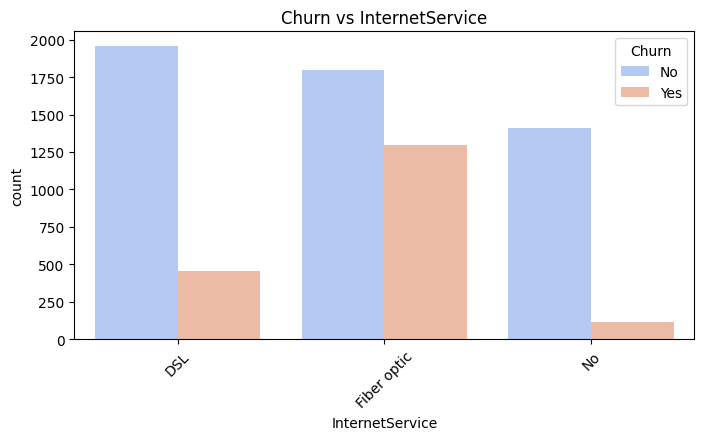

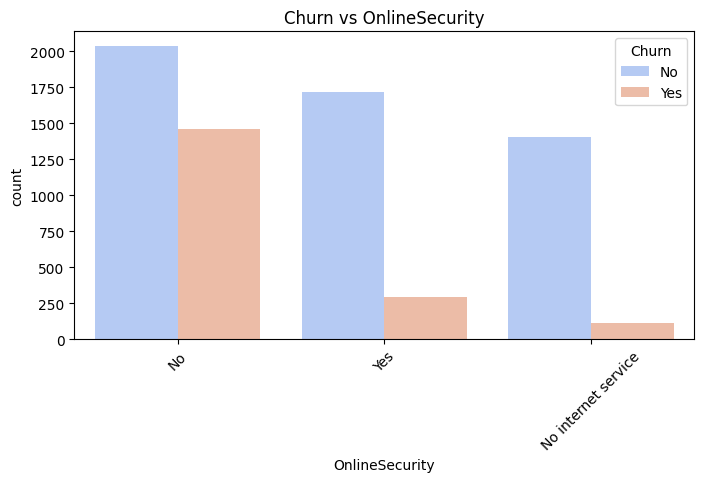

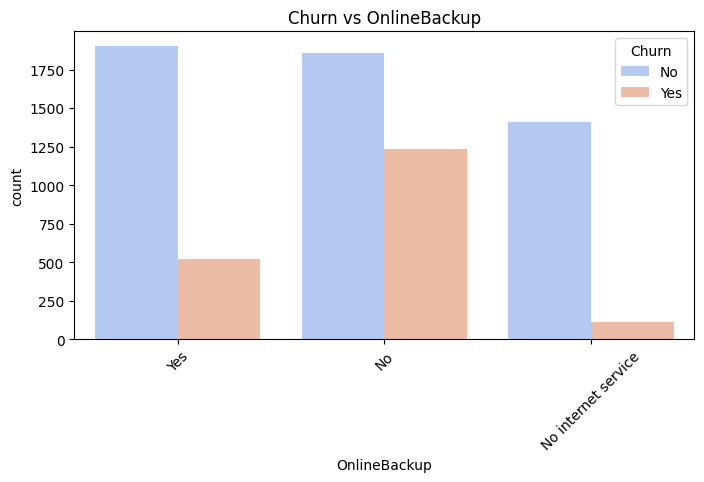

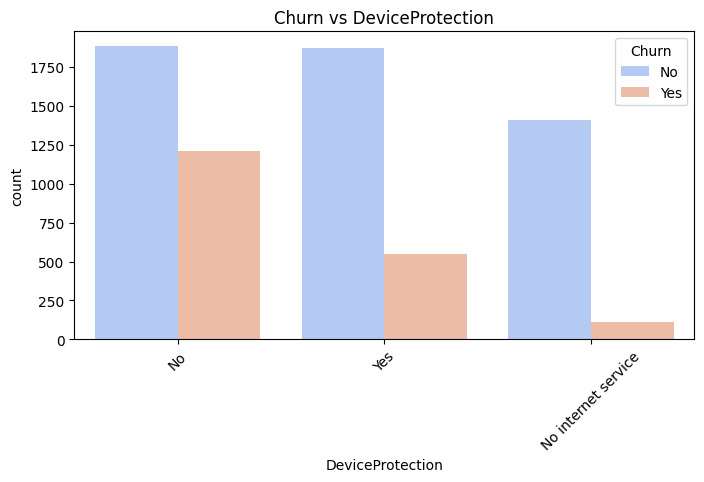

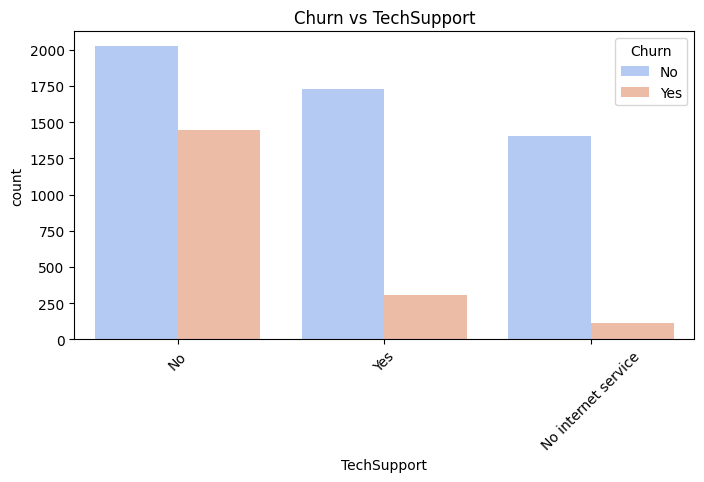

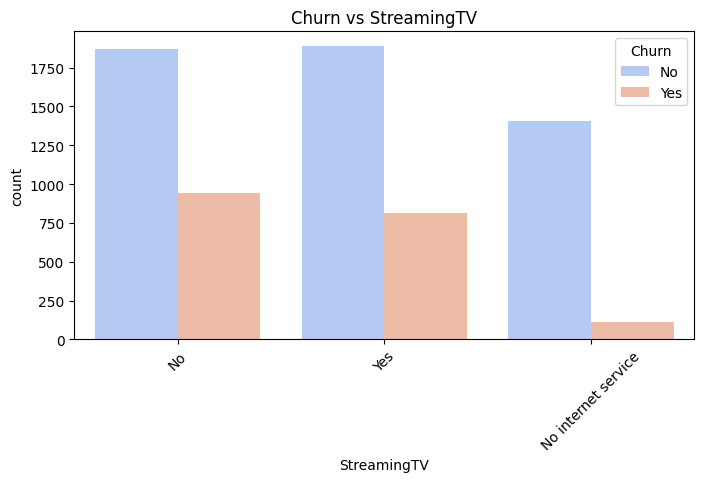

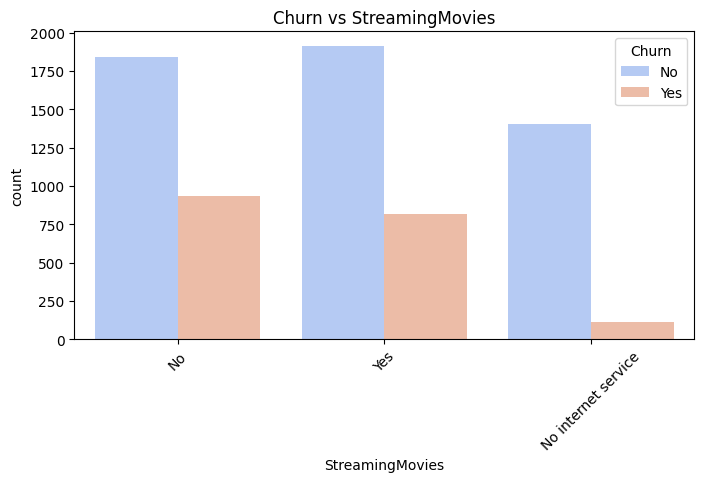

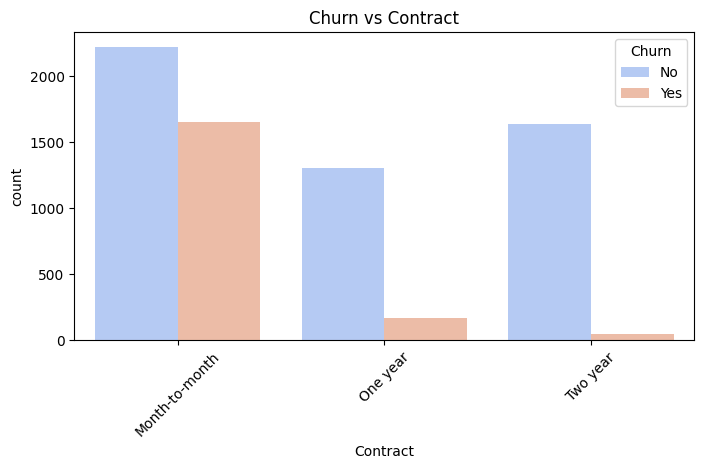

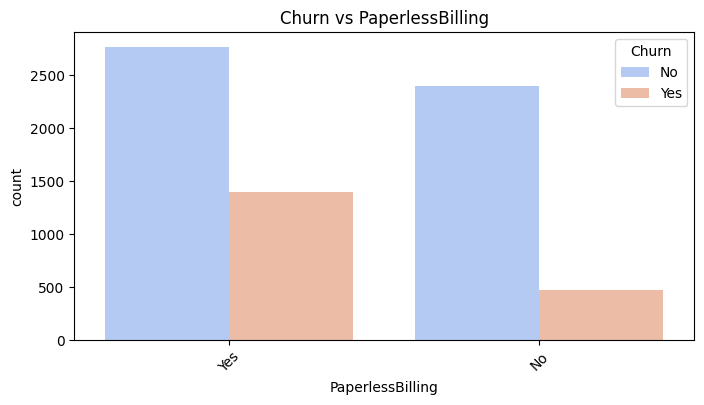

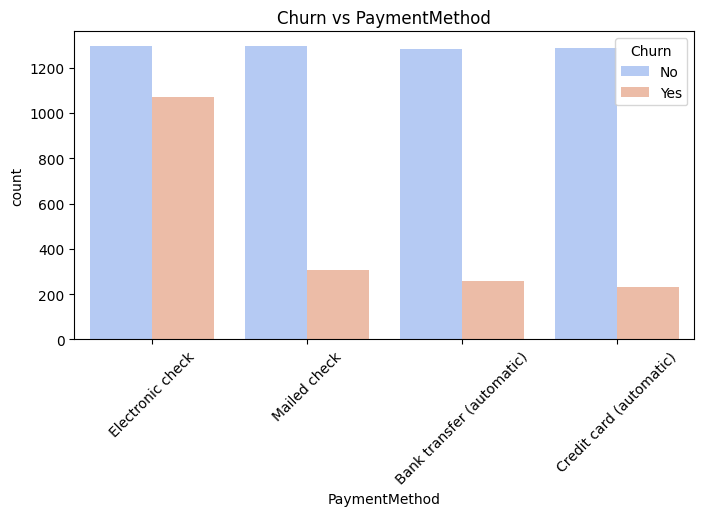

In [53]:
catadorical_features = [col for col in cat_cols if col not in ['customerID', 'TotalCharges','Churn']]

for col in catadorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()


#### Anylizing 

For male and female customers, the churn rate is quite similar!      

Similarly, the number of SeniorCitizens customers is quite low! However, we observe almost 40% churn in SeniorCitizens customers. Out of 1142 SeniorCitizens customers, a total of 476 customers have churned.                            

Customers who live with a partner experienced lower churn compared to those who do not live with a partner.                        

Similarly, customers without dependents have a higher churn rate!              

For Telephone Service, more customers were retained compared to those who churned, even though they do not have telephone service.                      

In the case of Multiple Lines, the churn rate is the same regardless of whether multiple lines are present or not.                             

A significant number of customers resisted the use of fiber optic cables for Internet Service. On the contrary, as seen in the graph above, customers prefer DSL for Internet Services!           

StreamingTV and StreamingMovies display the same graph. Many customers have churned regardless of whether they subscribe to StreamingTV and StreamingMovies.                 

When it comes to services, OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services are quite important, as shown in the above visualizations!                    

A significant number of customers have switched service providers due to the lack of these services mentioned above.                 

Churn is quite high in the Month-to-Month contract type. This is likely because customers are testing various services offered to them and thus testing the one-month service to save money!      

Another reason might be the inconsistent overall experience with Internet, streaming, and phone services. Each customer has a different priority, and when all three services are equally provided, one-third of them may cancel all services!                                 

Paperless Billing shows a high churn rate among many customers. This is likely due to some payment issues or receipt problems.                         

Customers have clearly expressed frustration with the Electronic Check Payment Method. Surprisingly, out of 2365 invoices paid via electronic check, 1071 customers have churned using this payment method. The company definitely needs to address this issue.                           

### Density Distribution of Charges by Churn Status

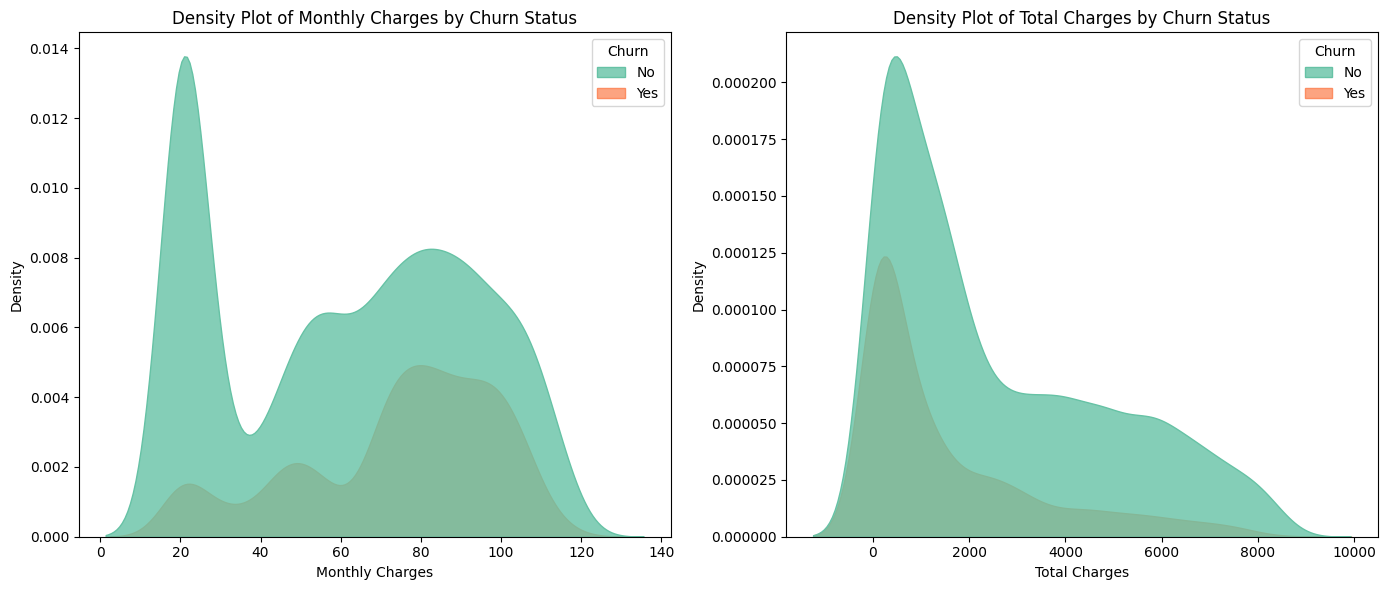

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=df, x='MonthlyCharges', hue="Churn", fill=True, alpha=0.8, ax=axes[0], palette='Set2')
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

sns.kdeplot(data=df, x='TotalCharges', hue="Churn", fill=True, alpha=0.8, ax=axes[1], palette='Set2')
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


#### Anylize

As we can see , Churn is more common among customers with higher monthly charges, indicating that expensive plans might contribute to customer attritio

Also , Customers with lower total charges have a higher churn rate.

### Data Preprocessing 

In [55]:
def print_unique_vals(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} :{df[column].unique()}')

In [56]:
print_unique_vals(df)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


### Feture Engineering 

In [57]:
df=df.copy()
df["ServiceCost_Ratio"] = df["MonthlyCharges"] / df["TotalCharges"]
df["Spending_Efficiency"] = df["TotalCharges"].fillna(0) / (df["tenure"].fillna(0) + 1)


### Label Encoding 

#### label encoding categorical fetures 

In [58]:
enc_df=df.copy()
le=LabelEncoder()
for col in cat_cols:
    enc_df[col]=le.fit_transform(enc_df[col])

enc_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCost_Ratio,Spending_Efficiency
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,1.000000,14.925000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,0.030140,53.985714
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,0.497920,36.050000
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,0.022980,40.016304
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,0.466205,50.550000


In [59]:
def print_unique_valss(df):
    for column in df:
         print(f'{column} :{df[column].unique()}')

In [60]:
print_unique_valss(enc_df)

gender :[0 1]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :[0 1]
MultipleLines :[1 0 2]
InternetService :[0 1 2]
OnlineSecurity :[0 2 1]
OnlineBackup :[2 0 1]
DeviceProtection :[0 2 1]
TechSupport :[0 2 1]
StreamingTV :[0 2 1]
StreamingMovies :[0 2 1]
Contract :[0 1 2]
PaperlessBilling :[1 0]
PaymentMethod :[2 3 0 1]
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :[0 1]
ServiceCost_Ratio :[1.         0.03014025 0.49791956 ... 0.08543801 0.24266145 0.01543575]
Spending_Efficiency :[ 14.925       53.98571429  36.05       ...  28.87083333  61.32
 102.15671642]


### Normalizing numerical data using standard scaler

Our numerical data is on different scales, which can impact our model’s performance. To improve accuracy and efficiency, we need to scale the data for better feature consistency.

In [61]:
scl_df=enc_df.copy()
scaler=StandardScaler()
scale_dt=['tenure','MonthlyCharges','TotalCharges','ServiceCost_Ratio','Spending_Efficiency']
scl_df[scale_dt]=scaler.fit_transform(scl_df[scale_dt])
scl_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCost_Ratio,Spending_Efficiency
0,0,0,1,0,-1.280248,0,1,0,0,2,...,0,0,0,1,2,-1.161694,-0.994194,0,2.992700,-1.447223
1,1,0,0,0,0.064303,1,0,0,2,0,...,0,0,1,0,3,-0.260878,-0.173740,0,-0.452779,-0.167059
2,1,0,0,0,-1.239504,1,0,0,2,2,...,0,0,0,1,3,-0.363923,-0.959649,1,1.209032,-0.754879
3,1,0,0,0,0.512486,0,1,0,2,0,...,0,0,1,0,0,-0.747850,-0.195248,0,-0.478217,-0.624888
4,0,0,0,0,-1.239504,1,0,1,0,0,...,0,0,0,1,2,0.196178,-0.940457,1,1.096365,-0.279660


In [62]:
scl_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCost_Ratio,Spending_Efficiency
0,0,0,1,0,-1.280248,0,1,0,0,2,...,0,0,0,1,2,-1.161694,-0.994194,0,2.992700,-1.447223
1,1,0,0,0,0.064303,1,0,0,2,0,...,0,0,1,0,3,-0.260878,-0.173740,0,-0.452779,-0.167059
2,1,0,0,0,-1.239504,1,0,0,2,2,...,0,0,0,1,3,-0.363923,-0.959649,1,1.209032,-0.754879
3,1,0,0,0,0.512486,0,1,0,2,0,...,0,0,1,0,0,-0.747850,-0.195248,0,-0.478217,-0.624888
4,0,0,0,0,-1.239504,1,0,1,0,0,...,0,0,0,1,2,0.196178,-0.940457,1,1.096365,-0.279660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,2,0,2,0,...,2,2,1,1,3,0.664868,-0.129180,0,-0.408506,0.673071
7039,0,0,1,1,1.612573,1,2,1,0,2,...,2,2,1,1,1,1.276493,2.241056,0,-0.510060,1.369239
7040,0,0,1,1,-0.872808,0,1,0,2,0,...,0,0,0,1,2,-1.170004,-0.854514,0,-0.256331,-0.990167
7041,1,1,1,0,-1.158016,1,2,1,0,0,...,0,0,0,1,3,0.319168,-0.872095,1,0.302214,0.073313


### Feature Correlation Analysis

#### Correlation Heatmap

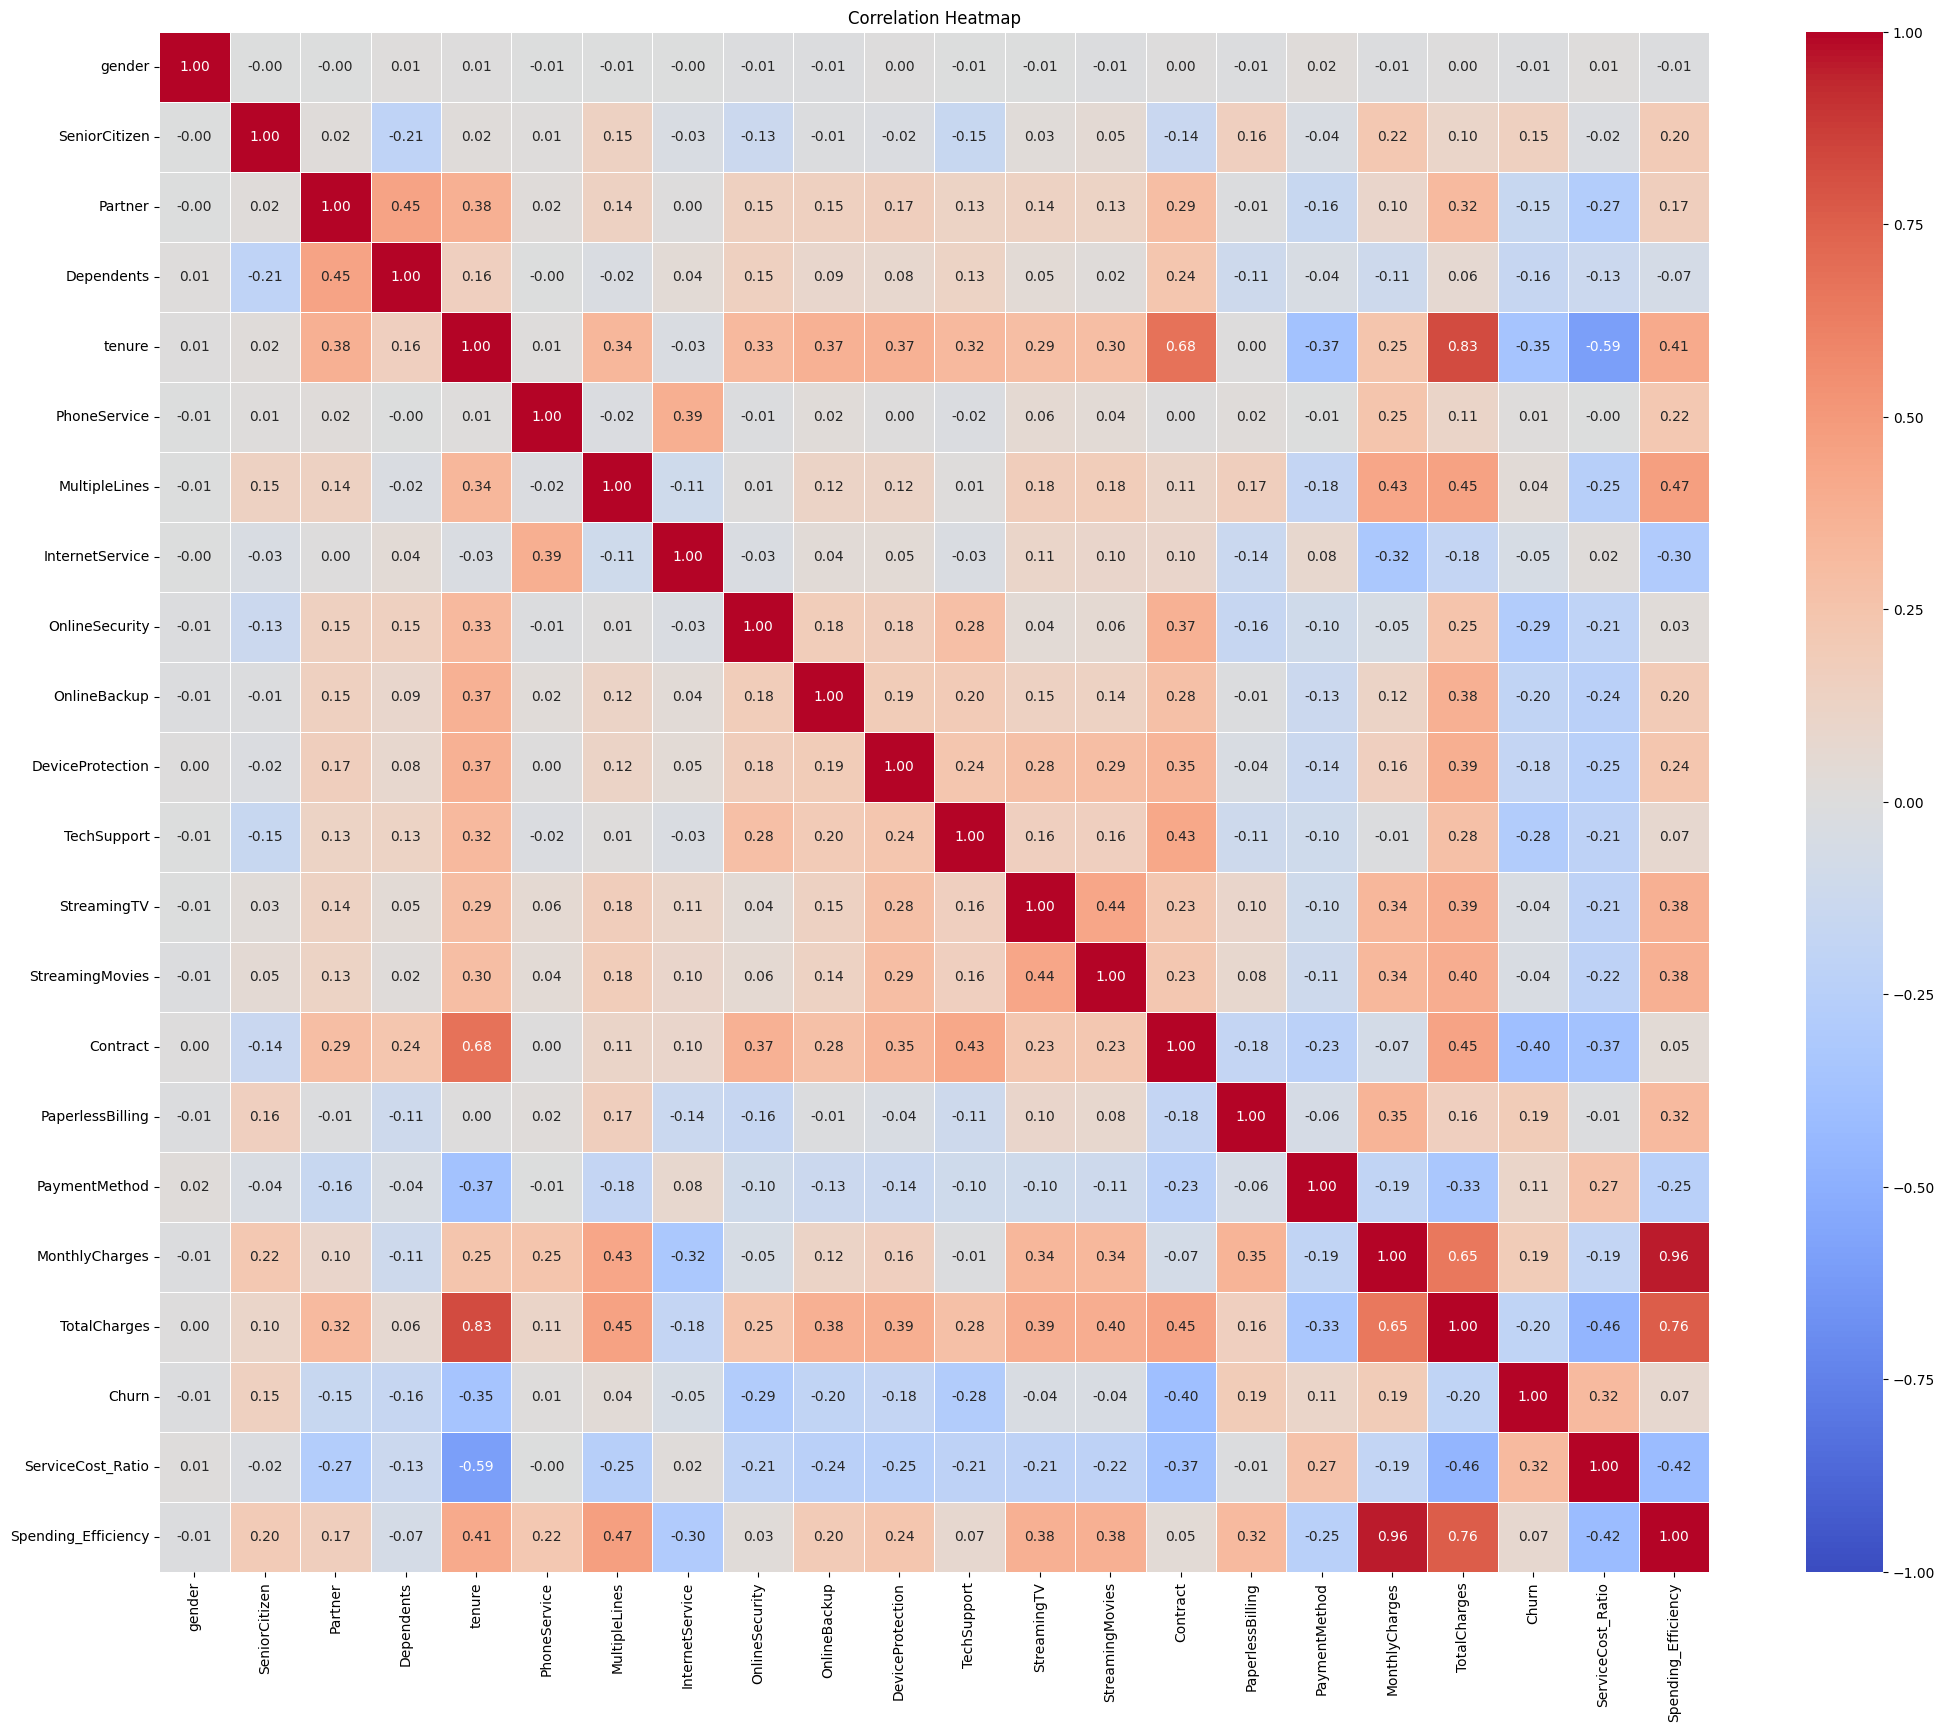

In [63]:
plt.figure(figsize=(25, 20))  

sns.heatmap(
    scl_df.corr(), 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1, 
    vmax=1
)


plt.title("Correlation Heatmap")
plt.show()


### Feture Selection Categorical Data

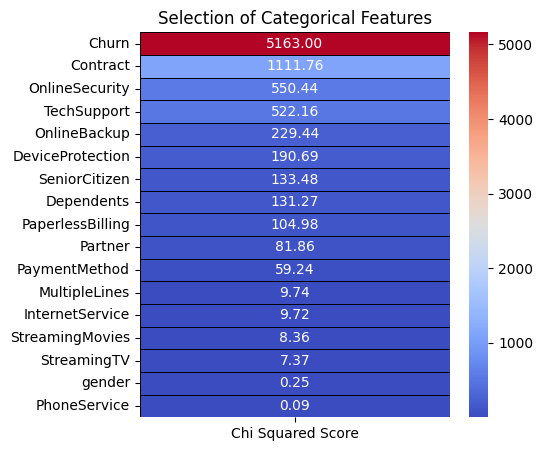

In [64]:
cat_cols = cat_cols + ['SeniorCitizen']  

features = scl_df.loc[:, cat_cols]
target = scl_df.loc[:, 'Churn']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

colors = sns.color_palette("coolwarm", as_cmap=True)

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()


### Feature Selection for Numerical Features


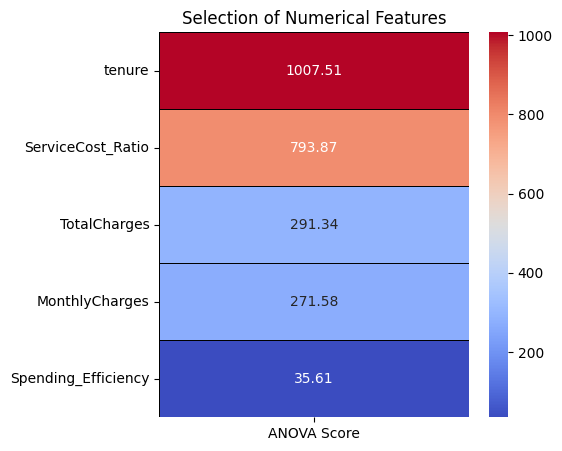

In [65]:
num_cl=['tenure','MonthlyCharges','TotalCharges','ServiceCost_Ratio','Spending_Efficiency']
features = scl_df.loc[:,num_cl]
target = scl_df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');


Features like **PhoneService**, **Gender**, **StreamingTV**, **StreamingMovies**, **InternetService**, and **MultipleLines** show weak correlations with the target (**Churn**) and should be removed. Additionally, **SpendingEfficiency****** is highly correlated with other numerical features, potentially causing redundancy, so it should also be dropped.

In [66]:
data=scl_df.copy()
data.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService','Spending_Efficiency'],inplace = True)
data.head()


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCost_Ratio
0,0,1,0,-1.280248,0,2,0,0,0,1,2,-1.161694,-0.994194,0,2.992700
1,0,0,0,0.064303,2,0,2,0,1,0,3,-0.260878,-0.173740,0,-0.452779
2,0,0,0,-1.239504,2,2,0,0,0,1,3,-0.363923,-0.959649,1,1.209032
3,0,0,0,0.512486,2,0,2,2,1,0,0,-0.747850,-0.195248,0,-0.478217
4,0,0,0,-1.239504,0,0,0,0,0,1,2,0.196178,-0.940457,1,1.096365


In [67]:
data.shape

(7032, 15)

### Traianing and test data split



In [68]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [69]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

We need to balance our data inorder to enhance our model efficency

#### Handeling imbalenced data

In [70]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [71]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

#### Scaling Fetures

In [72]:
scaler=StandardScaler()
X_train_sm=scaler.fit_transform(X_train_sm)
X_test_sm=scaler.transform(X_test_sm)

In [73]:
print(y_train_sm.value_counts())

Churn
1    4134
0    4126
Name: count, dtype: int64


### Modeling

In [74]:
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

### Finding the best parameters using GridSearchCV by defining a hyperparameter tuning grid

In [75]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20]
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.5],  
    'n_estimators': [100, 200, 300]
}

param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.5],  
    'n_estimators': [100, 200, 300]
}
param_grid_stacking = {
    'final_estimator__max_depth': [3, 5, 10],  
    'final_estimator__n_estimators': [100, 200, 300],
    'final_estimator__learning_rate': [0.01, 0.05, 0.1]
}


We define hyperparameter grids for our machine learning models so we can find the best combination of settings to improve each model’s performance.



In [76]:
def train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cross_val = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    
    predictions = best_model.predict(X_test)
    
    print(f"\nBest Parameters: {grid_search.best_params_}")
    
    print(f"Cross Validation Score: {cross_val * 100:.2f}%")
    
    roc_auc = roc_auc_score(y_test, predictions)
    print(f"ROC AUC Score: {roc_auc * 100:.2f}%")
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {accuracy * 100:.2f}%")
    
    cm = confusion_matrix(y_test, predictions)
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = cm.flatten()
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    cm_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels, counts, percentages)]
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=np.asarray(cm_labels).reshape(2,2), cmap='Blues', fmt='')
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    
    return best_model  




In [77]:
def check_overfitting(model, X_train, y_train, X_test, y_test):
    
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    if train_accuracy - test_accuracy > 0.1:  
        print("Warning: The model might be overfitting!")
        return True  
    else:
        print("No overfitting detected.")
        return False 

#### Random Forest Classifire


Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Cross Validation Score: 90.59%
ROC AUC Score: 82.29%
Accuracy Score: 82.28%


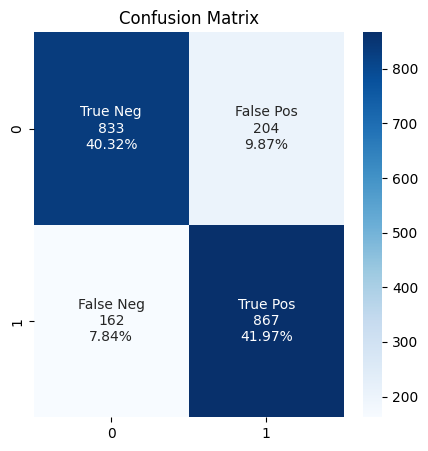


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1037
           1       0.81      0.84      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [78]:
classifier_rf = train_and_evaluate(RandomForestClassifier(random_state=42), param_grid_rf, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


In [111]:
check_overfitting(classifier_rf, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


Train Accuracy: 99.75%
Test Accuracy: 82.28%


True

#### DecisionTreeClassifier


Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Cross Validation Score: 82.54%
ROC AUC Score: 77.28%
Accuracy Score: 77.25%


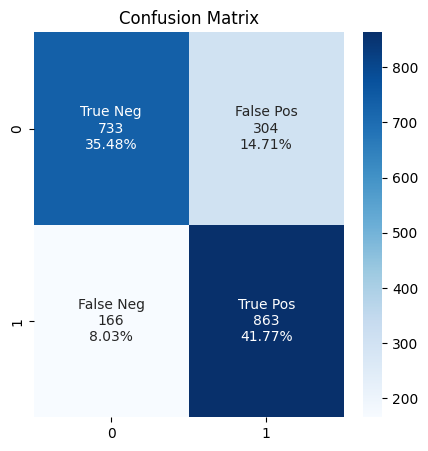


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1037
           1       0.74      0.84      0.79      1029

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



In [79]:
classifier_dt = train_and_evaluate(DecisionTreeClassifier(random_state=42), param_grid_dt, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


In [80]:
check_overfitting(classifier_dt, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


Train Accuracy: 85.51%
Test Accuracy: 77.25%
No overfitting detected.


False

#### XGBClassifier


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Cross Validation Score: 89.08%
ROC AUC Score: 80.80%
Accuracy Score: 80.78%


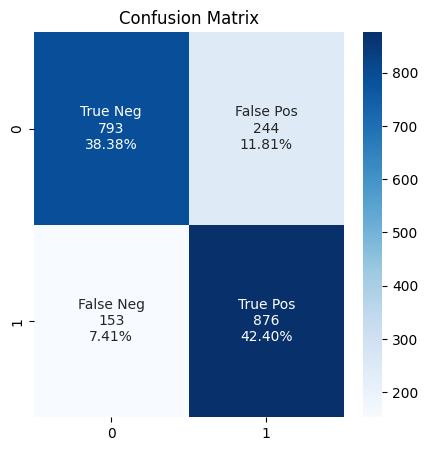


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1037
           1       0.78      0.85      0.82      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [81]:
classifier_xgb = train_and_evaluate(XGBClassifier(random_state=42), param_grid_xgb, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


In [82]:
check_overfitting(classifier_xgb, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


Train Accuracy: 88.64%
Test Accuracy: 80.78%
No overfitting detected.


False

#### LGBMClassifier


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Cross Validation Score: 90.28%
ROC AUC Score: 82.10%
Accuracy Score: 82.09%


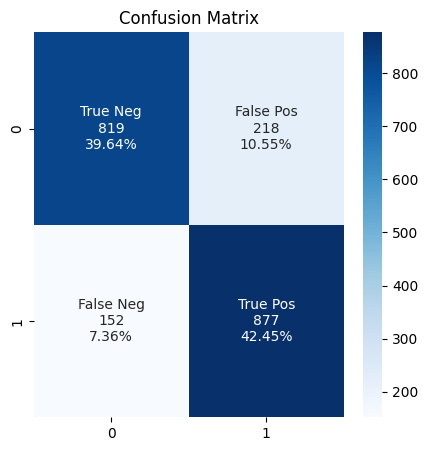


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1037
           1       0.80      0.85      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [83]:
classifier_lgbm = train_and_evaluate(LGBMClassifier(random_state=42,verbose=-1), param_grid_lgbm, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


In [84]:
check_overfitting(classifier_lgbm, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


Train Accuracy: 90.71%
Test Accuracy: 82.09%
No overfitting detected.


False

#### Stacked Ensemble Learning with XGBoost, LightGBM, Random Forest, and Decision Tree

In [85]:
stacking_model = StackingClassifier(
    estimators=[('Random Forest', classifier_rf),
                ('Decision Tree', classifier_dt),
                ('XGBoost', classifier_xgb),
                ('LightGBM', classifier_lgbm)],
    final_estimator=classifier_dt  
)


Best Parameters: {'final_estimator__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 100}
Cross Validation Score: 90.28%
ROC AUC Score: 82.10%
Accuracy Score: 82.09%


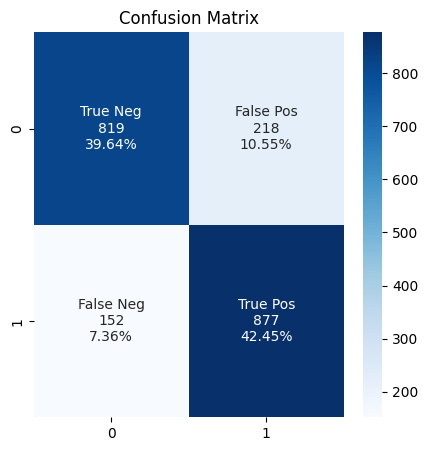


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1037
           1       0.80      0.85      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [87]:
stacked_model = train_and_evaluate(classifier_lgbm, param_grid_stacking, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


In [88]:
check_overfitting(stacked_model, X_train_sm, y_train_sm, X_test_sm, y_test_sm)


Train Accuracy: 90.71%
Test Accuracy: 82.09%
No overfitting detected.


False

#### Comparing Model's Accuracies

XGBoost - Accuracy: 0.8214
--------------------------------------------------
LightGBM - Accuracy: 0.8074
--------------------------------------------------
Random Forest - Accuracy: 0.8258
--------------------------------------------------
Decision Tree - Accuracy: 0.7556
--------------------------------------------------
KNN - Accuracy: 0.7657
--------------------------------------------------
Stacking - Accuracy: 0.8209
--------------------------------------------------


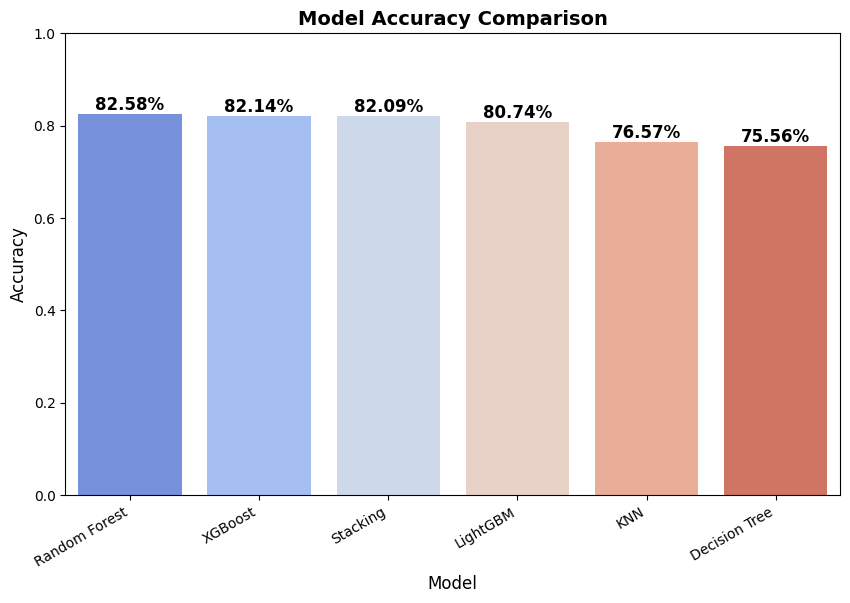

In [91]:
results = []

models['Stacking'] = stacked_model

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)  
    y_pred = model.predict(X_test_sm)
    accuracy = accuracy_score(y_test_sm, y_pred)

    print(f"{name} - Accuracy: {accuracy:.4f}")
    print("-" * 50)

    results.append([name, accuracy])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=df_results, palette='coolwarm')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}",  
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30, ha='right')  
plt.ylim(0, 1) 

plt.show()


#### Analyzing

Our final model is **XGBoost** due to following reasons:
Accuracy: 80.78% (higher than Decision Tree & close to Random Forest and LightGBM)     ROC AUC Score: 80.80% (shows strong ability to distinguish between churn & non-churn)  
Balanced Precision & Recall: Both are well-balanced, meaning fewer false positives & false negatives.           
Train Accuracy (88.64%) vs. Test Accuracy (80.78%):
The gap is not too large, meaning XGBoost avoids overfitting compared to Random Forest (99.75% train accuracy vs. 82.28% test accuracy).        

This indicates XGBoost generalizes well to new/unseen data.
XGBoost supports regularization, boosting, and parallel processing, making it     
Faster & more efficient than traditional ensemble methods.

We didn't use **Stacking** because its accuracy wasn't significantly better than XGBoost. Since the stacked model didn’t outperform XGBoost, and stacking requires training multiple models along with a final estimator—making it more time-consuming and resource-intensive—it wasn’t worth the extra complexity. Given that XGBoost achieved the same accuracy with less computational cost, it was the more efficient choice. 

### Predicting Churn 

In [92]:
def predict_churn(model, scaler, feature_values):
    
    features_array = np.array(feature_values).reshape(1, -1)
    
    scaled_features = scaler.transform(features_array)
    
    prediction = model.predict(scaled_features)
    probability = model.predict_proba(scaled_features)[:, 1] 
    
    return prediction[0], probability[0]


In [95]:
feature_values = [0, 1, 0, 12, 1, 1, 0, 1, 2, 1, 3, 70.5, 800.0, 0.09]  

churn_prediction, churn_probability = predict_churn(classifier_xgb, scaler, feature_values)

print(f"Predicted Churn: {churn_prediction}")  
print(f"Churn Probability: {churn_probability:.2%}")

Predicted Churn: 0
Churn Probability: 19.46%


In [96]:
feature_values = [0, 1, 1, 50, 1, 1, 1, 1, 2, 1, 2, 85.0, 4000.0, 0.02]  
churn_prediction, churn_probability = predict_churn(classifier_xgb, scaler, feature_values)
print(f"Predicted Churn: {churn_prediction}")  
print(f"Churn Probability: {churn_probability:.2%}")  


Predicted Churn: 0
Churn Probability: 30.41%


In [97]:
feature_values = [0, 1, 0, 20, 0, 1, 1, 0, 1, 1, 3, 65.0, 1300.0, 0.10]  
churn_prediction, churn_probability = predict_churn(classifier_xgb, scaler, feature_values)
print(f"Predicted Churn: {churn_prediction}")  
print(f"Churn Probability: {churn_probability:.2%}")  


Predicted Churn: 1
Churn Probability: 57.94%
